According to a report/study done by Mckinsey and Compnay in 2013. 35% of what people purchase on Amazon and 75% of what people watch on Netfix come from recommendations. This shows that recommendation systems are powerful tools.

Recommendation systems help users discover items they may not have known were previously there and that may be relevant to them.

content based filtering is based on the features of the items.
collaborative filtering is based on similar user preferences.


In the world of collaborative filtering there are usually two types of ratings, explicit ratings and implicit ratings.
Explicit: number of stars or thumbs up/down
Implicit ratings: Based on passive tracking of behavior (ex. number of movies seen in different genres). These are usually generated from the frequency of your actions. (count of user actions)

Our data is suited for content based and user based filtering

### Wrangling

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("MyFirstjson1").getOrCreate()

In [5]:
ratings = spark.read.option("multiline","true").json("Electronics_5.json")
ratings.show()

+----------+-------+--------------------+-----------+-------------+------------+------------+--------------+--------------+--------+----+
|      asin|overall|          reviewText| reviewTime|   reviewerID|reviewerName|       style|       summary|unixReviewTime|verified|vote|
+----------+-------+--------------------+-----------+-------------+------------+------------+--------------+--------------+--------+----+
|0151004714|    5.0|This is the best ...|09 18, 1999|AAP7PPBU72QFM|D. C. Carrad|{ Hardcover}|A star is born|     937612800|    true|  67|
+----------+-------+--------------------+-----------+-------------+------------+------------+--------------+--------------+--------+----+



In [6]:
metadata = spark.read.option("multiline","true").json("meta_Electronics.json")
metadata.show()

+--------+---------+----------+---------+--------------------+----------------+--------------------+--------------------+---+--------------------+--------------------+------------------+------+--------------------+------------+-----+-----+--------------------+
|also_buy|also_view|      asin|    brand|            category|            date|         description|             feature|fit|            imageURL|     imageURLHighRes|          main_cat| price|                rank|similar_item|tech1|tech2|               title|
+--------+---------+----------+---------+--------------------+----------------+--------------------+--------------------+---+--------------------+--------------------+------------------+------+--------------------+------------+-----+-----+--------------------+
|      []|       []|0011300000|GeoVision|[Electronics, Cam...|January 28, 2014|[The following ca...|[Genuine Geovisio...|   |[https://images-n...|[https://images-n...|Camera &amp; Photo|$65.00|[>#3,092 in Tools...|   

In [7]:
from pyspark.sql.types import StringType, IntegerType, StructType, StructField, TimestampType, DateType

In [8]:
schema = StructType([StructField('asin', StringType(), True),
                     StructField('brand', StringType(), True),
                     StructField('title', StringType(), True),
                     StructField('description', StringType(), True),
                     StructField('price', StringType(), True),
                     StructField('rank', StringType(), True)
                    ])

In [9]:
schema1 = StructType([StructField('asin', StringType(), True),
                     StructField('overall', StringType(), True),
                     StructField('reviewTime', StringType(), True),
                     StructField('reviewerID', StringType(), True),
                     StructField('reviewerName', StringType(), True),
                     StructField('style', StringType(), True),
                     StructField('summary', StringType(), True),
                     StructField('vote', StringType(), True),
                    ])

In [10]:
meta = spark.read.schema(schema) \
        .json("meta_Electronics.json").sample(fraction=0.3, seed=42)
meta.printSchema()
meta.show()

root
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- price: string (nullable = true)
 |-- rank: string (nullable = true)

+----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      asin|               brand|               title|         description|               price|                rank|
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|0060219602|Visit Amazon's Di...|Hurray for Hattie...|                  []|.a-section.a-spac...|2,024,298 in Books (|
|0101635370|          Crazy Cart|abcGoodefg&reg; 4...|["Support system:...|                    |[">#177,454 in El...|
|0302643370|                  WB|The Lord of the R...|["While Frodo &am...|                    |[">#359,908 in El...|
|0312171048|Visit Amazon's Je...|The Angel Doll: A...|["YA?L

In [11]:
ratings = spark.read.schema(schema1) \
        .json("Electronics_5.json").sample(fraction=0.3, seed=42)
ratings.printSchema()
ratings.show()

root
 |-- asin: string (nullable = true)
 |-- overall: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- vote: string (nullable = true)

+----------+-------+-----------+--------------+--------------------+--------------------+--------------------+----+
|      asin|overall| reviewTime|    reviewerID|        reviewerName|               style|             summary|vote|
+----------+-------+-----------+--------------+--------------------+--------------------+--------------------+----+
|0151004714|    5.0| 09 4, 2000|A1T17LMQABMBN5|     Caf Girl Writes|{"Format:":" Hard...|The most beautifu...|  13|
|0380709473|    5.0|07 30, 2015|A2AUQM1HT2D5T8|                 ema|{"Format:":" Kind...|          Five Stars|null|
|0511189877|    2.0|04 14, 2014|A3J3BRHTDRFJ2G|            EJ Honda|                null| Ergonomic

In [12]:
# Import all from `sql.types`
from pyspark.sql.types import *

# Write a custom function to convert the data type of DataFrame columns

def convertColumn(df, names, newType):
    for name in names: 
        df = df.withColumn(name, df[name].cast(newType))
    return df 

# List of continuous features
CONTI_FEATURES  = ['overall', 'vote']
# Convert the type
ratings = convertColumn(ratings, CONTI_FEATURES, FloatType())


# Check the dataset
ratings.printSchema()
meta.printSchema()

root
 |-- asin: string (nullable = true)
 |-- overall: float (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- vote: float (nullable = true)

root
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- price: string (nullable = true)
 |-- rank: string (nullable = true)



In [13]:
# Lets fix the format of the reviewTime column (Do we even need time as a feature?)

from pyspark.sql.functions import *
ratings = ratings.withColumn('reviewTime', regexp_replace('reviewTime', ', ', '-'))
ratings = ratings.withColumn('reviewTime', regexp_replace('reviewTime', ' ', '-'))
for i in range(1,10):
    ratings = ratings.withColumn('reviewTime', regexp_replace('reviewTime', '-'+str(i)+'-', '-0'+str(i)+'-'))
ratings.show(5)

+----------+-------+----------+--------------+---------------+--------------------+--------------------+----+
|      asin|overall|reviewTime|    reviewerID|   reviewerName|               style|             summary|vote|
+----------+-------+----------+--------------+---------------+--------------------+--------------------+----+
|0151004714|    5.0|09-04-2000|A1T17LMQABMBN5|Caf Girl Writes|{"Format:":" Hard...|The most beautifu...|13.0|
|0380709473|    5.0|07-30-2015|A2AUQM1HT2D5T8|            ema|{"Format:":" Kind...|          Five Stars|null|
|0511189877|    2.0|04-14-2014|A3J3BRHTDRFJ2G|       EJ Honda|                null| Ergonomic nightmare|12.0|
|0511189877|    2.0|11-11-2016| A2OSUEZJIN7BI|          Chris|                null|        Cannot Learn|null|
|0511189877|    4.0|03-10-2016|A12JHGROAX49G7|        Linwood|                null|Works Good and pr...|null|
+----------+-------+----------+--------------+---------------+--------------------+--------------------+----+
only showi

In [14]:
# Now that we have fixed the string, we can convert the column from string to a date type.

ratings = ratings.withColumn('reviewTime', 
                   to_date(unix_timestamp(col('reviewTime'), 'MM-dd-yyyy').cast("timestamp")))

If we are to change the column to date type, we have to know that the default for Datetype in pyspark is yyyy-MM-dd, we can change the strings in the column to this using a function and then convert to Datetype.


In [15]:
# We can also rename the ratings asin column
ratings = ratings.withColumnRenamed("asin", "ProductId")

It works! We also see that there are a lot of product id's that are strings because they have an 'X' at the end. These will show as null if we convert the column to an integer type. We first need to replace these Xs and then convert the column.

In [16]:
ratings.count()

2022695

In [17]:
# We can also join the two df on the item Ids (Review)

df = ratings.join(meta,ratings.ProductId == meta.asin,"inner")
df.printSchema()

root
 |-- ProductId: string (nullable = true)
 |-- overall: float (nullable = true)
 |-- reviewTime: date (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- vote: float (nullable = true)
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- price: string (nullable = true)
 |-- rank: string (nullable = true)



### Selecting the features we want to potentially use

We can always add in more features from those available later for our more complex models, but for our initial simple recommender system we stick to these.

In [18]:
cols = ("asin","brand","summary", "description", "vote", "style", 'rank', 'price','reviewTime','reviewerName')

df = df.drop(*cols)
df.printSchema()
df.show(5)

root
 |-- ProductId: string (nullable = true)
 |-- overall: float (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- title: string (nullable = true)

+----------+-------+--------------+--------------------+
| ProductId|overall|    reviewerID|               title|
+----------+-------+--------------+--------------------+
|0528881469|    2.0| A2CPBQ5W4OGBX|Rand McNally 5288...|
|0528881469|    5.0|A3H86FCI0QZH7T|Rand McNally 5288...|
|0758247621|    4.0|A3RF010MX29BQP|The Bite Before C...|
|0758247621|    2.0|A37W3T69W2Y2PC|The Bite Before C...|
|0758247621|    2.0|A2IF5C0I5BH11F|The Bite Before C...|
+----------+-------+--------------+--------------------+
only showing top 5 rows



### EDA

In terms of visualization of data, pandas has a lot more library support for this than pyspark. We can convert our pyspark df into pandas to start visualizing our data.

In [19]:
import pandas as pd
vis = df.toPandas()
vis = pd.DataFrame(vis)

In [20]:
vis.head()

,ProductId,overall,reviewerID,title
0,0528881469,2.0,A2CPBQ5W4OGBX,Rand McNally 528881469 7-inch Intelliroute TND...
1,0528881469,5.0,A3H86FCI0QZH7T,Rand McNally 528881469 7-inch Intelliroute TND...
2,0758247621,4.0,A3RF010MX29BQP,The Bite Before Christmas
3,0758247621,2.0,A37W3T69W2Y2PC,The Bite Before Christmas
4,0758247621,2.0,A2IF5C0I5BH11F,The Bite Before Christmas


C:\Users\18324\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\18324\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


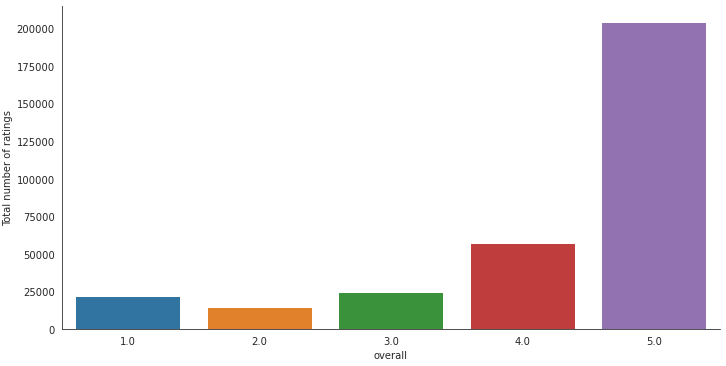

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
with sns.axes_style('white'):
    g = sns.factorplot("overall", data=vis, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

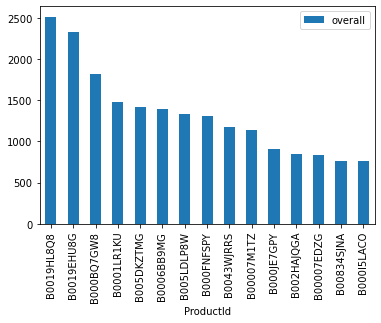

In [22]:
# Shows the product popularity based on the number of ratings given

popular_prods = pd.DataFrame(vis.groupby('ProductId')['overall'].count())
top_15 = popular_prods.sort_values('overall',ascending=False)

_ = top_15.head(15).plot(kind = "bar")

### Calculating sparsity

Sparsity is calculated by the number of cells in a matrix that contain a rating divided by the total number of values that matrix could hold given the number of users and items. 

In [23]:
# Total amount of ratings in the data
tot_ratings = df.select('overall').count()

In [24]:
tot_ratings

321918

In [25]:
# Number of distinct users and distinct products
tot_users = df.select('reviewerID').distinct().count()
tot_products = df.select('ProductId').distinct().count()

prod = tot_users * tot_products

In [26]:
# Find sparsity

sparsity = (1.0 - (tot_ratings *1.0)/prod)*100
print("The dataframe is ", "%.2f" % sparsity + "% empty.")

The dataframe is  99.99% empty.


### Summary statistics

We can get a better look at some of the statistics for both the products and the users.

In [27]:
# Min num ratings for products
print("Fewest number of ratings for a product: ")
df.groupBy("ProductId").count().select(min("count")).show()

# Avg num ratings per product
print("Avg num ratings per product: ")
df.groupBy("ProductId").count().select(avg("count")).show()

# Min num ratings for user
print("User with the fewest ratings: ")
df.groupBy("reviewerID").count().select(min("count")).show()

# Avg num ratings per users
print("Avg num ratings per user: ")
df.groupBy("reviewerID").count().select(avg("count")).show()

Fewest number of ratings for a product: 
+----------+
|min(count)|
+----------+
|         1|
+----------+

Avg num ratings per product: 
+------------------+
|        avg(count)|
+------------------+
|15.560614849187935|
+------------------+

User with the fewest ratings: 
+----------+
|min(count)|
+----------+
|         1|
+----------+

Avg num ratings per user: 
+------------------+
|        avg(count)|
+------------------+
|1.4237985298410423|
+------------------+



### Assigning integer Ids

In [28]:
users = df.select('reviewerID').distinct()

In [29]:
# Coalesce method using user IDs
from pyspark.sql.functions import monotonically_increasing_id
users = users.coalesce(1)
users = users.withColumn('userIntId', monotonically_increasing_id()).persist()
users.show(5)

+--------------+---------+
|    reviewerID|userIntId|
+--------------+---------+
|A3HBNQT0ZFKISO|        0|
| A5OA88NHOC3HZ|        1|
|A2BS625G7TZPQV|        2|
| ANE8EPVOZRCYP|        3|
|A1A7FHG6U8IA79|        4|
+--------------+---------+
only showing top 5 rows



In [30]:
new_df = df.join(users, "reviewerId", "left")
new_df.show()

+--------------+----------+-------+--------------------+---------+
|    reviewerID| ProductId|overall|               title|userIntId|
+--------------+----------+-------+--------------------+---------+
| A2CPBQ5W4OGBX|0528881469|    2.0|Rand McNally 5288...|    76842|
|A3H86FCI0QZH7T|0528881469|    5.0|Rand McNally 5288...|     5558|
|A3RF010MX29BQP|0758247621|    4.0|The Bite Before C...|    30374|
|A37W3T69W2Y2PC|0758247621|    2.0|The Bite Before C...|   127674|
|A2IF5C0I5BH11F|0758247621|    2.0|The Bite Before C...|    33786|
|A348GYLVPWT8AK|0758247621|    2.0|The Bite Before C...|   160665|
|A1PUNXF1CHZAQX|0758247621|    4.0|The Bite Before C...|    96021|
|A19N3S7CBSU6O7|1400599997|    5.0|Barnes &amp; Nobl...|   131047|
| APWTOYJ5U0F07|1400599997|    5.0|Barnes &amp; Nobl...|    97102|
|  ABIN1JYQ9F3J|1400599997|    3.0|Barnes &amp; Nobl...|   108543|
| ATIOA4WH6UE1C|1400599997|    5.0|Barnes &amp; Nobl...|   148081|
|A28ZON2GCK6Y3X|1400599997|    5.0|Barnes &amp; Nobl...|   134

In [31]:
products = df.select('ProductId').distinct()

In [32]:
# Coalesce method using product IDs

products = products.coalesce(1)
products = products.withColumn('ProdIntId', monotonically_increasing_id()).persist()
products.show(5)

+----------+---------+
| ProductId|ProdIntId|
+----------+---------+
|B00000JBK6|        0|
|B000067RL2|        1|
|B000068UY7|        2|
|B00006JLOT|        3|
|B00006OAJ4|        4|
+----------+---------+
only showing top 5 rows



In [33]:
new_df = new_df.join(products, "ProductId", "left")
new_df.show()

+----------+--------------+-------+--------------------+---------+---------+
| ProductId|    reviewerID|overall|               title|userIntId|ProdIntId|
+----------+--------------+-------+--------------------+---------+---------+
|0528881469| A2CPBQ5W4OGBX|    2.0|Rand McNally 5288...|    76842|      104|
|0528881469|A3H86FCI0QZH7T|    5.0|Rand McNally 5288...|     5558|      104|
|0758247621|A3RF010MX29BQP|    4.0|The Bite Before C...|    30374|     1123|
|0758247621|A37W3T69W2Y2PC|    2.0|The Bite Before C...|   127674|     1123|
|0758247621|A2IF5C0I5BH11F|    2.0|The Bite Before C...|    33786|     1123|
|0758247621|A348GYLVPWT8AK|    2.0|The Bite Before C...|   160665|     1123|
|0758247621|A1PUNXF1CHZAQX|    4.0|The Bite Before C...|    96021|     1123|
|1400599997|A19N3S7CBSU6O7|    5.0|Barnes &amp; Nobl...|   131047|      723|
|1400599997| APWTOYJ5U0F07|    5.0|Barnes &amp; Nobl...|    97102|      723|
|1400599997|  ABIN1JYQ9F3J|    3.0|Barnes &amp; Nobl...|   108543|      723|

### Simple ALS model buildout

In [34]:
(training_data, test_data) = new_df.randomSplit([0.8, 0.2], seed=42)

In [35]:
from pyspark.ml.recommendation import ALS

als = ALS(userCol="userIntId", itemCol="ProdIntId", ratingCol="overall", rank =10, maxIter =15, regParam =0.1,
          coldStartStrategy="drop", nonnegative =True, implicitPrefs = False)

# Fit the mdoel to the training_data
model = als.fit(training_data)

# Generate predictions on the test_data
test_predictions = model.transform(test_data)
test_predictions.show()

+----------+--------------+-------+--------------------+---------+---------+----------+
| ProductId|    reviewerID|overall|               title|userIntId|ProdIntId|prediction|
+----------+--------------+-------+--------------------+---------+---------+----------+
|B004Z8VCEG|A2UFG3DMVELP6I|    5.0|MITSUBISHI-Compat...|       65|      807| 1.8478628|
|B0016IXEWG|A2HDNN5ZDII5U5|    5.0|Belkin Mini 5W 3-...|      101|     6942| 1.6267794|
|B001NJ27QM| AT0KCH9Y5BCQK|    5.0| Coolerguys Singl...|      183|     9352| 3.2923946|
|B000X1TS54|A1E94ESL5XM4HM|    4.0|SONOS BRIDGE for ...|      385|     6334| 2.7306578|
|B005918EFI|A2M2OSPYWXV01Y|    4.0|Monoprice Commerc...|      463|     7406| 2.2144563|
|B0013IWYHU|A1XM9SP8CG4J44|    3.0|Logitech Squeezeb...|      496|     7997| 2.8398883|
|B0040720NO|A2YXKWRDT3J2C8|    5.0|Pyle Home PTCDS1U...|     1139|      588| 2.9423933|
|B0013CDZDI|A2RV4HD179FOGE|    4.0|Home Audio Power ...|     1165|     1877|  2.790855|
|B003TW6B3G|A2RV4HD179FOGE|    4

### Evaluating performance

In [36]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(metricName="rmse", labelCol="overall", predictionCol="prediction")
RMSE = evaluator.evaluate(test_predictions)
print(RMSE)

1.7642952281923179


We can see that the RMSE is high. However, this was a simple buildout, we can work on improvements and complexity from here. This includes hyperparameter tuning, changing which features are present, etc.

### Making recommendations

Here we can use our engine to recommend electronic products to our users.

In [43]:
user_recs=model.recommendForAllUsers(20).show(20)

+---------+--------------------+
|userIntId|     recommendations|
+---------+--------------------+
|       28|[{3815, 5.9208527...|
|       31|[{18656, 3.593120...|
|       34|[{488, 6.2994123}...|
|       53|[{19380, 5.689323...|
|       65|[{11014, 7.078497...|
|       78|[{9295, 4.6201515...|
|       81|[{6464, 4.095128}...|
|       85|[{8332, 6.6328545...|
|      101|[{17808, 3.318189...|
|      108|[{934, 5.9189405}...|
|      115|[{11657, 6.109058...|
|      126|[{17517, 6.918933...|
|      137|[{1783, 4.340752}...|
|      148|[{12199, 7.055878...|
|      155|[{8397, 6.5744524...|
|      183|[{10290, 5.055439...|
|      193|[{2985, 1.3481464...|
|      211|[{7415, 7.5267124...|
|      243|[{14978, 6.859053...|
|      251|[{13607, 4.313615...|
+---------+--------------------+
only showing top 20 rows

